### **1. Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [2]:
import warnings
warnings.filterwarnings("ignore")

### **2. Load Data**

In [3]:
titanic = pd.read_csv("/content/tested.csv")

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic.shape

(418, 12)

In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
titanic["Cabin"].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

In [8]:
titanic = titanic.drop(["Cabin"],axis=1)

In [9]:
titanic.dropna(inplace=True)

### **3. Initial Statistics**

In [10]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,1100.232628,0.383686,2.141994,30.181269,0.483384,0.398792,40.982087
std,122.910180,0.487019,0.846251,14.104573,0.875004,0.811582,61.228558
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,992.500000,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,1100.000000,0.000000,2.000000,27.000000,0.000000,0.000000,16.000000
75%,1210.500000,1.000000,3.000000,39.000000,1.000000,1.000000,40.633350
max,1307.000000,1.000000,3.000000,76.000000,8.000000,6.000000,512.329200


**0 -->  Dead** **||**
**1 -->  Alive**

In [11]:
titanic["Survived"].value_counts()

0    204
1    127
Name: Survived, dtype: int64

In [12]:
titanic["Pclass"].value_counts()

3    145
1     98
2     88
Name: Pclass, dtype: int64

In [13]:
titanic["SibSp"].value_counts()

0    213
1     97
2     11
3      4
4      4
5      1
8      1
Name: SibSp, dtype: int64

In [14]:
titanic["Parch"].value_counts()

0    246
1     50
2     29
3      3
4      1
6      1
5      1
Name: Parch, dtype: int64

In [15]:
titanic["Embarked"].value_counts()

S    227
C     82
Q     22
Name: Embarked, dtype: int64

### **4. Data Visualization**

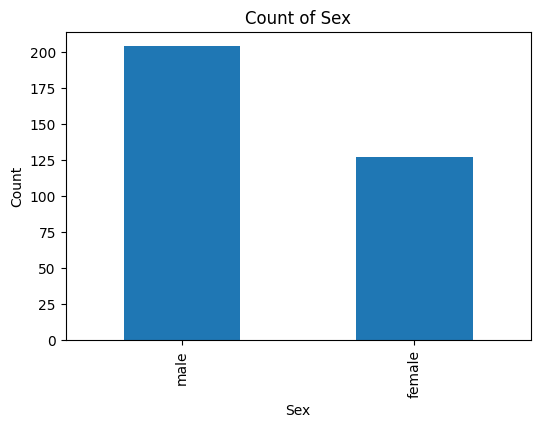

In [16]:
##Plotting bar graph on sex

counts = titanic['Sex'].value_counts()
plt.figure(figsize=(6, 4))
counts.plot(kind='bar')
plt.title('Count of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

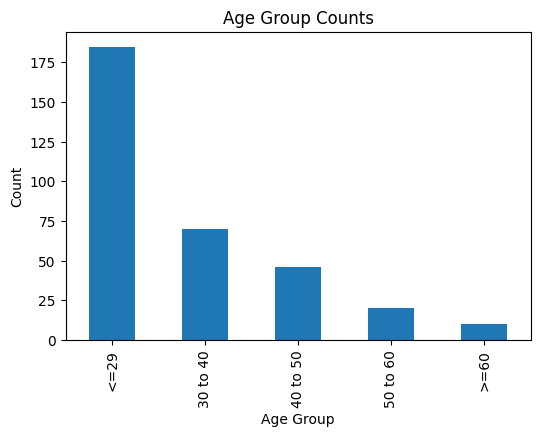

In [17]:
##Plotting bar graph on Age

groups = [0, 29, 40, 50, 60, float('inf')]
x_label = ['<=29', '30 to 40', '40 to 50', '50 to 60', '>=60']

titanic_age = titanic.copy()

titanic_age['Age Group'] = pd.cut(titanic_age['Age'], bins=groups, labels=x_label)

age_group_counts = titanic_age['Age Group'].value_counts()

plt.figure(figsize=(6, 4))
age_group_counts.plot(kind='bar')
plt.title('Age Group Counts')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

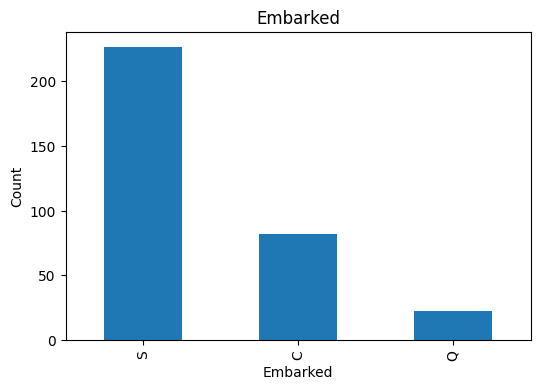

In [18]:
##Plotting bar graph on Embarked

embark = titanic['Embarked'].value_counts()
plt.figure(figsize=(6, 4))
embark.plot(kind='bar')
plt.title('Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

<Figure size 600x400 with 0 Axes>

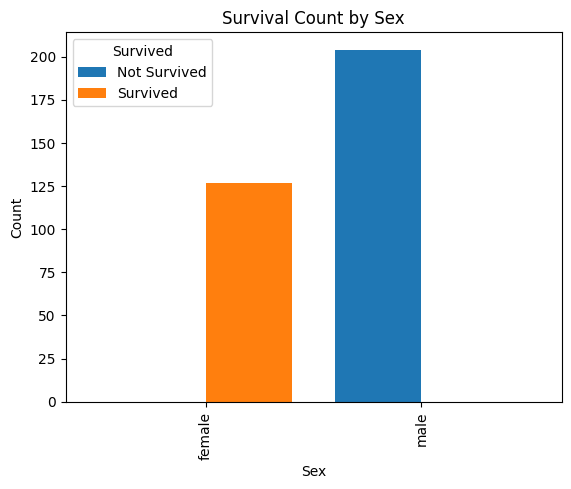

In [19]:
## Bar Graph of Count of Survived vs Sex

count_sex = titanic.groupby(['Sex', 'Survived']).size().reset_index(name='count')

count_sex_pivot = count_sex.pivot(index='Sex', columns='Survived', values='count')

plt.figure(figsize=(6, 4))
count_sex_pivot.plot(kind='bar', stacked=False, width=0.8)

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Count by Sex')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])

plt.show()


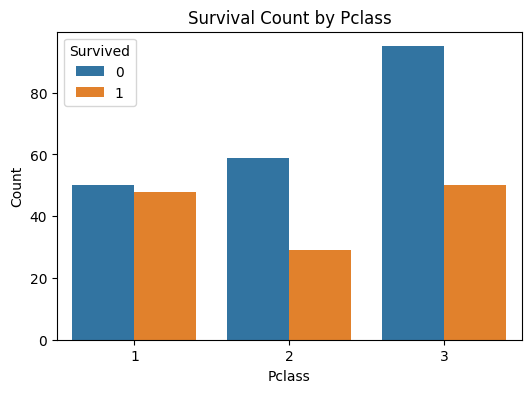

In [20]:
## Bar Graph of Count of Survived vs Pclass

count_Pclass = titanic.groupby(['Pclass', 'Survived']).size().reset_index(name='count')

plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='count', hue='Survived', data=count_Pclass, dodge=True)

plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Survival Count by Pclass')

plt.show()

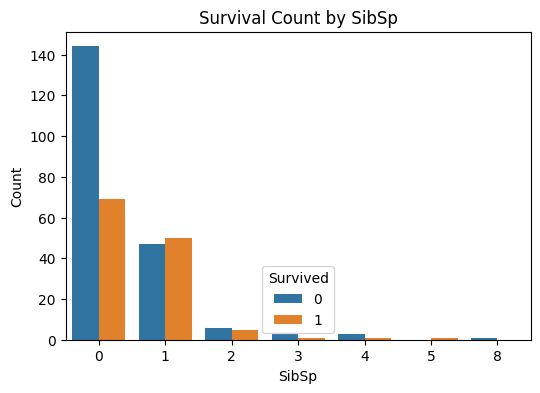

In [21]:
## Bar Graph of Count of Survived vs SibSp

count_SibSp = titanic.groupby(['SibSp', 'Survived']).size().reset_index(name='count')

plt.figure(figsize=(6, 4))
sns.barplot(x='SibSp', y='count', hue='Survived', data=count_SibSp, dodge=True)

plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('Survival Count by SibSp')

plt.show()

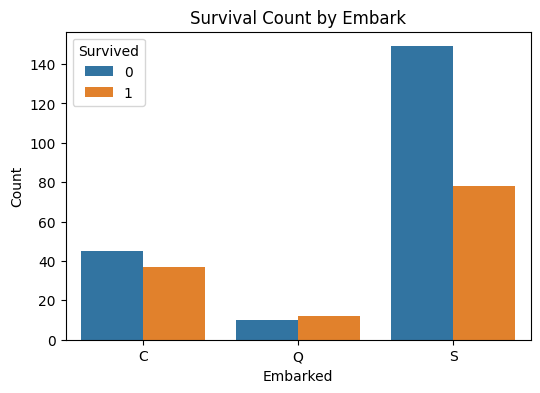

In [22]:
## Bar Graph of Count of Survived vs Embarked

count_embark = titanic.groupby(['Embarked', 'Survived']).size().reset_index(name='count')

plt.figure(figsize=(6, 4))
sns.barplot(x='Embarked', y='count', hue='Survived', data=count_embark, dodge=True)

plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Survival Count by Embark')

plt.show()

### **5. Feature Engineering**

In [23]:
le = LabelEncoder()

titanic["Embarked"] = le.fit_transform(titanic["Embarked"])
titanic["Sex"] = le.fit_transform(titanic["Sex"])

### **6. Splitting Data into Training and Testing Data**

In [24]:
X = titanic.drop(["PassengerId","Survived","Name","Ticket"], axis=1)
Y = titanic["Survived"]

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

### **7. Model Training and Evaluation**

In [26]:
model = LogisticRegression()
model.fit(x_train,y_train)


train_pred = model.predict(x_train)
train_acc = accuracy_score(train_pred, y_train)
train_f1score = f1_score(train_pred, y_train)
print("Accuracy Score of Training Data:-",train_acc)
print("F1 score of Training Data:-",train_f1score)

print("\n******************************\n")

test_pred = model.predict(x_test)
test_acc = accuracy_score(test_pred, y_test)
test_f1score = f1_score(test_pred, y_test)
print("Accuracy Score of Testing Data:-",test_acc)
print("F1 score of Testing Data:-",test_f1score)

print("\n******************************\n")

report = classification_report(test_pred, y_test)
print(report)

Accuracy Score of Training Data:- 1.0
F1 score of Training Data:- 1.0

******************************

Accuracy Score of Testing Data:- 1.0
F1 score of Testing Data:- 1.0

******************************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        31

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



### **8. Input From User**

In [28]:
## Taking input from the user and predicting the output

Pclass = int(input("Enter Pclass (1 || 2 || 3): "))
Sex = int(input("Enter Sex (0 || 1): "))
Age = float(input("Enter Age: "))
SibSp = int(input("Enter SibSp (0|| 1 || 2 || 3 || 4 || 5 || 6 || 7 || 8): "))
Parch = int(input("Enter Parch (0|| 1 || 2 || 3 || 4 || 5 || 6): "))
Fare = float(input("Enter Fare: "))
Embarked = int(input("Enter Embarked(0|| 1 || 2 ): "))

user_input = np.array([[Pclass,Sex,Age,SibSp,Parch,Fare,Embarked]])

predicted_species = model.predict(user_input)

print("\n")

if(predicted_species[0]==0):
  print("The Person did not Survived")
elif(predicted_species[0]==1):
  print("The Person did  Survived")


Enter Pclass (1 || 2 || 3): 3
Enter Sex (0 || 1): 0
Enter Age: 34.5
Enter SibSp (0|| 1 || 2 || 3 || 4 || 5 || 6 || 7 || 8): 0
Enter Parch (0|| 1 || 2 || 3 || 4 || 5 || 6): 0
Enter Fare: 7.8292
Enter Embarked(0|| 1 || 2 ): 0


The Person did  Survived
